# Random Walk solution of Laplace equation

## Problem 2.1
Consider a square box of size $1\times1$ where the left side has potential equal to +10 and the other sides have potential equal to +1

Divide the whole square into a mesh containing a certain number of equally spaced lattice sites. Typical numbers range from sides 30×30 to 100×100

Implement a discrete random walk algorith for solving the Laplace equation and report the dependence of the obatined potential distribution with heatmap.

### Discrete random walk algorithm
1. Start in a position $(x,y)$ where the value of the potential has to be estimated. Take a step in a random direction along the x or y axis. The step size is 1.

2. Continue taking steps until the walker reaches the boundary of the box. Accumulate the value of the potential at the boundary $V_b(i)$, where $i$ is the number of steps taken.

3. Repeat steps 1 and 2 a large M number of times and sum the potential at the boundary for each walker.

4. The potential at the point $(x,y)$ is given by the average of the potential at the boundary for all the walkers.

$$V(x,y) = \frac{1}{M}\sum_{i=1}^{M}V_b(i)$$

where $M$ is the total number of walkers.

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

N = 50 # number of sites in the box

M = 100 # number of random walk per position

# Create a 2D array NxN of positions 
Box = np.zeros((N,N))

# Function to perform a random walk
def random_walk(x, y, N):
    while True:
        # Choose a random move
        xmove = random.choice([-1, 0, 1])
        ymove = random.choice([-1, 0, 1])

        # Update the position
        x += xmove
        y += ymove

        # Check if the particle is outside the box
        if x >= N:
            return 10
        if y >= N:
            return 1
        if y <= 0:
            return 1
        if x <= 0:
            return 1

# Perform M random walks for each position in the box
for i in range(N):
    for j in range(N):
        temp = 0
        for k in range(M):
            temp = temp + random_walk(i, j, N)
        Box[i][j] = temp/M #Compute the estimated potential
    
# Plot the Box into an image as heatmap
plt.imshow(Box, cmap='inferno', interpolation='bilinear')

# Add a colorbar
cbar = plt.colorbar(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
cbar.ax.set_yticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

# Set plot title and axis labels
plt.title(r"Potential heatmap")
plt.xlabel(r"X-axis")
plt.ylabel(r"Y-axis")
plt.show()


KeyboardInterrupt: 

## Problem 2.2
Consider a two-dimensional model for a plane condenser composed of two nite-width plates of opposite potential. The voltage corresponds to the di erence of the potentials on the plates while zero potential can be imposed at the edges of the box.

Find the potential as the function of the position $V(x,y)$ and plot it with a heatmap figure.

To do so, use Gaussian displacement (Wiener process) in a continuous space to generate a suffciently large number of Random Walks and estimate the potential value according to the average over the boundary values, $V(x,y)\approx\frac1M\sum_{i=1}^M{V_b(i)}$ where $M$ is the total number of random walkers


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (9).

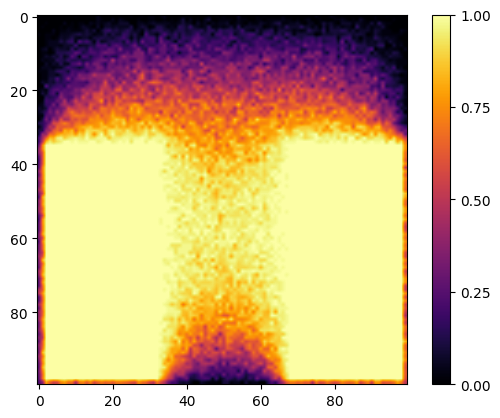

In [5]:
M = 40 # number of random walk per position

N = 100 # number of sites in the box

C1 = N/3 # position of the first plate of the condenser
C2 = 2*N/3 # position of the second plate of the condenser
L = N*4/5 # length of the plates

# Create a 2D array NxN of positions 
Box = np.zeros((N,N))

# Function to perform a random walk
def random_walk(x, y, N):
    while True:
        # Choose a random move
        xmove = random.choice([-1, 0, 1])
        ymove = random.choice([-1, 0, 1])

        # Update the position
        x += xmove
        y += ymove

        # Check if the particle is outside the box
        if x >= N:
            return 0
        if y >= N:
            return 0
        if y <= 0:
            return 0
        if x <= 0:
            return 0
        if x >= C1 and x <= C1+L and (y <= N/3 or y >= 2*N/3):
            return 1
        if x >= C2 and x <= C2+L and (y <= N/3 or y >= 2*N/3):
            return -1


for i in range(N):
    for j in range(N):
        temp = 0
        for k in range(M):
            temp = temp + random_walk(i, j, N)
        Box[i][j] = temp/M #Compute the estimated potential
    
# Plot the Box into an image as heatmap
plt.imshow(Box, cmap='inferno', interpolation='bilinear')

# Add a colorbar
cbar = plt.colorbar(ticks=[-1, -0.75, -0.5 -0.25, 0, 0.25, 0.5, 0.75, 1])
cbar.ax.set_yticklabels(['-1', '-0.75', '-0.5', '-0.25', '0', '0.25', '0.5', '0.75', '1'])

# Set plot title and axis labels
plt.title(r"Potential heatmap")
plt.xlabel(r"X-axis")
plt.ylabel(r"Y-axis")
plt.show()

Estimate the amplitude of the electrif field $E(x,y)$ its vector value corresponds to the antigradient of the potential field, $\vec E=-\nabla V$ and amplitude can be approximated as
$$ E=\sqrt{\left[\frac{V(x+\Delta x,y)-V(x,y)}{\Delta x}\right]^2+\left[\frac{V(x,y+\Delta y)-V(x,y)}{\Delta y}\right]^2} $$

Gaussian displacement should have zero expectation value, $\mu=0$, while the typical displacement length should be small compared to the size of the condenser.

Effects of the statistical noise is amplified in the calculation of the electric eld, as difference of the potential is calculated.